# Data Wrangling Phases Table of Contents

[1 - Gather](#Gather)

[2 - Assess](#Assess)

[3 - Clean](#Clean)



In [1]:
#importing required libraries and packages

import pandas as pd
import numpy as np
import requests

import time
import matplotlib.pyplot as plt
import seaborn as sns

import json
import tweepy
import re


<a id ="Gather"></a>

## 1 Gather


In [2]:
#Access twitter archive file just to have alook

df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.920000e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.920000e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.920000e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,8.920000e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,8.910000e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#downloading image predicton file programatically from udacity server

response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)



In [4]:
df_image = pd.read_csv('image-predictions.tsv' , sep = '\t')  #access and analyz this file

In [5]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#entering secret keys and tokens to access twitter api
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth , wait_on_rate_limit=True, wait_on_rate_limit_notify=True) 
#including handling parameters for timeouts

In [ ]:
# Testing functionality
tweet = api.get_status(892177421306343426, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
tweet

Rate limit reached. Sleeping for: 605


In [10]:

# Get json info
info = tweet._json
info

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'id': 892177421306343426,
 'id_str': '892177421306343426',
 'text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boop… https://t.co/aQFSeaCu9L",
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/aQFSeaCu9L',
    'expanded_url': 'https://twitter.com/i/web/status/892177421306343426',
    'display_url': 'twitter.com/i/web/status/8…',
    'indices': [117, 140]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 4196983835,
  'id_str': '4196983835',
  'name': 'WeRateDogs®',
  'screen_name': 'dog_rates',
  'location': 'links and things ➜',
  'description': 'Your Only Source For 

In [31]:
# getting tweets retweets and likes counts 
info['favorite_count']   ,   info['retweet_count'] 

(30364, 5495)

In [32]:
# list of tweet ids from archive tweets csv dataframe
df_tweet_ids = df_archive['tweet_id']


In [ ]:
# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

start = time.time() 



# For loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)




In [ ]:
# total tweets received without any error
print("The lengh of the result", len(df_tweets))

# The tweet_id for tweets with errors
print("The lengh of the errors", len(tweets_error_list))

In [ ]:

# creating DataFrames
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_favourites', 'date_time'])
# saving the dataFrame to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [6]:
# Read the saved tweet_json.txt file into a dataframe
df_tweetsdata = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [8]:
df_tweetsdata.head()

,tweet_id,favorites,retweets,user_favourites,date_time
0,892420643555336193,35072,7376,145807,2017-08-01 16:23:56
1,892177421306343426,30366,5495,145807,2017-08-01 00:17:27
2,891815181378084864,22828,3633,145807,2017-07-31 00:18:03
3,891689557279858688,38351,7554,145807,2017-07-30 15:58:51
4,891327558926688256,36629,8140,145807,2017-07-29 16:00:24


In [24]:
df_tweetsdata.tail()

,tweet_id,favorites,retweets,user_favourites,date_time
2326,666049248165822465,94,38,145807,2015-11-16 00:24:50
2327,666044226329800704,260,122,145807,2015-11-16 00:04:52
2328,666033412701032449,107,39,145807,2015-11-15 23:21:54
2329,666029285002620928,118,41,145807,2015-11-15 23:05:30
2330,666020888022790149,2343,444,145807,2015-11-15 22:32:08


In [25]:
df_tweetsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


## END : GATHER DATA
The 3 dataframes are:-
df_archive - contains data read from provided csv
df_image - contains data from tsv file downloaded from udacity server
df_tweetsdata - contains data after authenticating the twitter api by using tweepy library  

<a id ="Assess"></a>
## 2. Assess 

### Assess df_archive dataframe

In [26]:
#Assesing first dataframe  provided with info method for null or missing values

df_archive.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 17 columns):
tweet_id                      2348 non-null float64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2348 non-null object
source                        2348 non-null object
text                          2348 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2289 non-null object
rating_numerator              2348 non-null int64
rating_denominator            2348 non-null int64
name                          2348 non-null object
doggo                         2348 non-null object
floofer                       2348 non-null object
pupper                        2348 non-null object
puppo                         2348 non-null object
dtypes: float64(5), int64(2), 

In [27]:
#checking null values for all columns
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2271
in_reply_to_user_id           2271
timestamp                        0
source                           0
text                             0
retweeted_status_id           2169
retweeted_status_user_id      2169
retweeted_status_timestamp    2169
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [28]:
#duplicate values check
df_archive.duplicated().value_counts()  #no duplicates which is great

False    2348
dtype: int64

In [29]:
df_archive.dtypes  

# timestamp and retweeted_status_timestamp should be datetime datatype

# in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float



tweet_id                      float64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [30]:
(df_archive['name'].str.len()<= 1).value_counts() #checking dog names with just 1 letter to remove absurd data

False    2292
True       56
Name: name, dtype: int64

In [31]:
df_archive['rating_numerator'].describe()   ,   df_archive['rating_denominator'].describe()

(count    2348.000000
 mean       13.130750
 std        45.954706
 min         0.000000
 25%        10.000000
 50%        11.000000
 75%        12.000000
 max      1776.000000
 Name: rating_numerator, dtype: float64, count    2348.000000
 mean       10.456985
 std         6.756671
 min         0.000000
 25%        10.000000
 50%        10.000000
 75%        10.000000
 max       170.000000
 Name: rating_denominator, dtype: float64)

In [32]:
df_archive['rating_denominator'].value_counts()

10     2325
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Assess df_image dataframe

In [33]:
df_image.info()   #images dataframe analysis and great it seems no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
df_image.isnull().sum()   #it seems no null values great

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
df_image.duplicated().value_counts()   #no duplicates in this df

False    2075
dtype: int64

### Assess df_tweetsdata dataframe

In [36]:
df_tweetsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


In [37]:
df_tweetsdata.describe()

,tweet_id,favorites,retweets,user_favourites
count,2.331000e+03,2331.000000,2331.000000,2331.000000
mean,7.419079e+17,7324.291291,2593.960532,145807.012441
std,6.823170e+16,11375.552911,4388.053648,0.110867
min,6.660209e+17,0.000000,1.000000,145807.000000
25%,6.782670e+17,1270.000000,526.000000,145807.000000
50%,7.182469e+17,3179.000000,1210.000000,145807.000000
75%,7.986692e+17,8953.000000,3004.000000,145807.000000
max,8.924206e+17,150820.000000,74453.000000,145808.000000


In [38]:
df_tweetsdata.isnull().sum()   #no null values identified

tweet_id           0
favorites          0
retweets           0
user_favourites    0
date_time          0
dtype: int64

In [39]:
df_tweetsdata.duplicated().value_counts()   #no duplicates identified

False    2331
dtype: int64

## Issues found after Assessment:-



### Quality Issues - 

#### df_archive  dataframe

1.  Delete Retweet data and Remove columns with missing data no longer       needed missing data :- retweeted_status_id ,retweeted_status_user_id     ,retweeted_status_timestamp,in_reply_to_status_id,in_reply_to_user_id  
2. timestamp should be datetime datatype

3. Clean the content of source column, make it more readable.

4. Multiple dog life stages issues

5. Dog life stages missing issue

6. Fix Dogs name with  single character or null values 

####  df_tweetsdata dataframe


7. datetime should be of datatime datatype instead of string 


#### df_archive  dataframe


8. solve multiple dog stages issue

#### df_image dataframe

9. p1_conf, p2_conf and p3_conf and p1_dog,p2_dog,p3_dog columns merged for ,meaningful insights and df_image should only have jpg_url and tweet_id, breed and image no info from p1,p2,p3 columns 
 


### Tidiness Issues - 


#### df_archive  dataframe

1. Combine dog stages into one column



#### All clean dataframes should be merged into one in the last
2. df_archive_clean df should be joined to df_image_clean  and df_tweetsdata_clean





<a id = "Clean"></a>

## 3. Clean Data using template  Define, Code, Test

### Define
Qual 1) Delete retweet data remove columns with missing data no longer needed :- retweeted_status_id ,retweeted_status_user_id , retweeted_status_timestamp , in_reply_to_status_id,in_reply_to_user_id
since these 

In [9]:
df_archive.info()  #initial rows before retweets deletion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 17 columns):
tweet_id                      2348 non-null float64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2348 non-null object
source                        2348 non-null object
text                          2348 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2289 non-null object
rating_numerator              2348 non-null int64
rating_denominator            2348 non-null int64
name                          2348 non-null object
doggo                         2348 non-null object
floofer                       2348 non-null object
pupper                        2348 non-null object
puppo                         2348 non-null object
dtypes: float64(5), int64(2), 

### Code

In [10]:

# Make copies to preserve the original datasets
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweetsdata_clean = df_tweetsdata.copy()

In [11]:
#delete retweets using status related data 
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_timestamp.isnull()]
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_user_id.isnull()]

In [12]:
# Delete columns we don't need anymore
df_archive_clean.drop('retweeted_status_id', axis=1, inplace=True)
df_archive_clean.drop('retweeted_status_user_id', axis=1, inplace=True)
df_archive_clean.drop('retweeted_status_timestamp', axis=1, inplace=True)
df_archive_clean.drop('in_reply_to_status_id', axis=1, inplace=True)
df_archive_clean.drop('in_reply_to_user_id', axis=1, inplace=True)



### Test

In [13]:
# check clean dataframe

df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2347
Data columns (total 12 columns):
tweet_id              2169 non-null float64
timestamp             2169 non-null object
source                2169 non-null object
text                  2169 non-null object
expanded_urls         2111 non-null object
rating_numerator      2169 non-null int64
rating_denominator    2169 non-null int64
name                  2169 non-null object
doggo                 2169 non-null object
floofer               2169 non-null object
pupper                2169 non-null object
puppo                 2169 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 220.3+ KB


### Define
Qual 2) timestamp should be datetime datatype


### Code

In [14]:
# change column dfatatype


df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')



### Test

In [46]:
#check all columns again 
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2347
Data columns (total 12 columns):
tweet_id              2169 non-null float64
timestamp             2169 non-null datetime64[ns]
source                2169 non-null object
text                  2169 non-null object
expanded_urls         2111 non-null object
rating_numerator      2169 non-null int64
rating_denominator    2169 non-null int64
name                  2169 non-null object
doggo                 2169 non-null object
floofer               2169 non-null object
pupper                2169 non-null object
puppo                 2169 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 220.3+ KB


### Define
Qual 3) Clean the content of source column, make it more readable.

### Code

In [15]:
# before cleaning source column so that more meaningful data can be extracted

df_archive_clean['source'].value_counts()



<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2037
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
# cleaning source column so that more meaningful data can be extracted

df_archive_clean['source'] = df_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])




### Test

In [48]:
#check all columns again 
df_archive_clean.source.value_counts()

Twitter for iPhone     2037
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Define
Qual 4)Multiple life stages or dog types columns issue

### Code

In [17]:
#count after manual cleaning from excel file


df_archive_clean.doggo.value_counts()  ,  df_archive_clean.pupper.value_counts()    ,  df_archive_clean.floofer.value_counts()   , df_archive_clean.puppo.value_counts()

(None     2093
 doggo      76
 Name: doggo, dtype: int64, None      1943
 pupper     226
 Name: pupper, dtype: int64, None       2159
 floofer      10
 Name: floofer, dtype: int64, None     2144
 puppo      25
 Name: puppo, dtype: int64)

In [18]:
# programatically also checking and deleting multiple dog stages for doggo and pupper case 



df_archive_clean.query('text.str.contains("doggo").values & text.str.contains("pupper").values')



,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
573,8.010000e+17,2016-11-22 17:28:25,Twitter for iPhone,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,None,None,pupper,None
703,7.860000e+17,2016-10-11 00:34:48,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,None,None
950,7.520000e+17,2016-07-09 01:08:47,Twitter for iPhone,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,None,None,None,None


In [19]:
#checking index column values for these rows again

df_archive_clean[(df_archive_clean.text.str.contains("doggo").values) & (df_archive_clean.text.str.contains("pupper").values)].index



Int64Index([573, 703, 950], dtype='int64')

In [20]:
# some more combination column

df_archive_clean[(df_archive_clean.text.str.contains("doggo").values) & (df_archive_clean.text.str.contains("puppo").values)].index


Int64Index([172, 191], dtype='int64')

In [21]:
#drop these rows

df_archive_clean.drop(df_archive_clean[df_archive_clean.text.str.contains("doggo").values & df_archive_clean.text.str.contains("pupper").values].index ,inplace=True)


df_archive_clean.drop(df_archive_clean[df_archive_clean.text.str.contains("doggo").values & df_archive_clean.text.str.contains("puppo").values].index , inplace=True)


### Test

In [22]:
#check again for confirmation
df_archive_clean[(df_archive_clean.text.str.contains("doggo").values) & (df_archive_clean.text.str.contains("pupper").values)].index



Int64Index([], dtype='int64')

In [23]:
df_archive_clean[(df_archive_clean.text.str.contains("doggo").values) & (df_archive_clean.text.str.contains("puppo").values)].index


Int64Index([], dtype='int64')

In [24]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2347
Data columns (total 12 columns):
tweet_id              2164 non-null float64
timestamp             2164 non-null datetime64[ns]
source                2164 non-null object
text                  2164 non-null object
expanded_urls         2106 non-null object
rating_numerator      2164 non-null int64
rating_denominator    2164 non-null int64
name                  2164 non-null object
doggo                 2164 non-null object
floofer               2164 non-null object
pupper                2164 non-null object
puppo                 2164 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 219.8+ KB


### Define
Qual 5)Mismatch dog type or life stages issue

### Code

In [25]:
dog_types = list(df_archive_clean.iloc[:,-4:])
dog_types

['doggo', 'floofer', 'pupper', 'puppo']

In [26]:
def find_dog_type(df, dog_type):
    dog_list = []
    for row in df['text']:
        if dog_type in row:
            dog_list.append(dog_type)
        else:
            dog_list.append(np.NaN)
    return dog_list

In [27]:
for dog_type in dog_types:
    df_archive_clean[dog_type] = find_dog_type(df_archive_clean, dog_type)

### Test

In [28]:
#check all columns again 
df_archive_clean[dog_types].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2347
Data columns (total 4 columns):
doggo      78 non-null object
floofer    4 non-null object
pupper     242 non-null object
puppo      30 non-null object
dtypes: object(4)
memory usage: 84.5+ KB


In [29]:

# Compare to counts from text
for dog_type in dog_types:
    print(dog_type, df_archive_clean.text.str.contains(dog_type).sum())

doggo 78
floofer 4
pupper 242
puppo 30


### Define
Qual 6)Fix Dogs name with single character or null values

### Code

In [73]:
# fix absurd and short adjectives confused as name as well as None names




words = df_archive[df_archive.name.str.islower()].name.unique()


df_archive_clean['name'] = df_archive_clean['name'].replace(words, np.nan)
df_archive_clean['name'] = df_archive_clean['name'].replace('None', np.nan)
df_archive_clean.name = df_archive_clean.name.str.replace('^[a-z]+', 'None')


In [74]:
df_archive_clean['name'].dropna()

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
6              Jax
8             Zoey
9           Cassie
10            Koda
11           Bruno
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
19          Canela
20          Gerald
21         Jeffrey
23          Canela
26            Maya
27          Mingus
28           Derek
29          Roscoe
31         Waffles
33           Jimbo
34          Maisey
36           Lilly
38            Earl
39            Lola
           ...    
2260          Dook
2262          Hall
2263      Philippe
2266         Reese
2267       Cupcake
2271         Biden
2272          Fwed
2274     Genevieve
2275        Joshwa
2278       Timison
2281      Clarence
2282       Kenneth
2283       Churlie
2284       Bradlay
2285         Pipsy
2287          Gabe
2288         Clybe
2289          Dave
2292          Keet
2294        Klevin
2295         Carll
2300        

### Test

In [75]:
#check all columns again 
df_archive_clean.name.value_counts()

Charlie     12
Lucy        11
Oliver      11
Cooper      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
Sadie        8
Toby         7
Buddy        7
Daisy        7
Bailey       7
Rusty        6
Bella        6
Jax          6
Milo         6
Leo          6
Stanley      6
Scout        6
Jack         6
Dave         6
Oscar        6
Koda         6
George       5
Louis        5
Gus          5
Sammy        5
Larry        5
            ..
Blue         1
Colin        1
Yoda         1
Keet         1
Bobble       1
Murphy       1
Stuart       1
Kellogg      1
Eevee        1
Mingus       1
Barney       1
Gert         1
Winifred     1
Blakely      1
Pete         1
Leonidas     1
Tonks        1
Benny        1
Bronte       1
Monster      1
Kial         1
Brownie      1
Brudge       1
Rey          1
Jett         1
Craig        1
Bertson      1
Cupid        1
Grady        1
Holly        1
Name: name, Length: 931, dtype: int64

In [76]:
df_archive_clean['name'].describe()

count        1501
unique        931
top       Charlie
freq           12
Name: name, dtype: object

### Define
Qual 7) date_time should be of datatime datatype instead of string

### Code

In [34]:
# drop retweet and reply status not analysis worthy columns

df_tweetsdata_clean['date_time'] = pd.to_datetime(df_tweetsdata_clean['date_time'], format='%Y-%m-%d %H:%M:%S')



### Test

In [66]:
#check all columns again 
df_tweetsdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 91.1 KB


### Define
Qual  8)user_favourites value is same for all rows and we can delete this column or keep it but its of no use

### Code

In [35]:
# drop retweet and reply status not analysis worthy columns


df_tweetsdata_clean.drop(['user_favourites'], axis=1, inplace=True)

### Test

In [36]:
#check all columns again 
df_tweetsdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id     2331 non-null int64
favorites    2331 non-null int64
retweets     2331 non-null int64
date_time    2331 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 72.9 KB


### Define
Qual 8) p1, p2 and p3 should be categoral datatype

### Code

In [37]:
# convert to category datatype

df_image_clean['p1'] = df_image_clean['p1'].astype('category')
df_image_clean['p2'] = df_image_clean['p2'].astype('category')
df_image_clean['p3'] = df_image_clean['p3'].astype('category')

#p1_conf, p2_conf and p3_conf columns should be merged
#p1_dog, p2_dog and p3_dog columns should be merged


### Test

In [38]:
#check all columns again 
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


## Define
Qual 9)Creates a predicted dog breed column, based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements


### Code

In [39]:
#image sample

df_image_clean.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1136,728760639972315136,https://pbs.twimg.com/media/Ch0T71OWMAA4yIw.jpg,1,Pembroke,0.939134,True,Cardigan,0.054336,True,Chihuahua,0.00559,True


In [40]:
df_image_clean['pred_breed'] = [df['p1'] if df['p1_dog'] == True and df['p1_conf'] > 0.2 
                     else df['p2'] if df['p2_dog'] == True and df['p2_conf'] > 0.2
                     else df['p3'] if df['p3_dog'] == True and df['p3_conf'] > 0.2
                     else np.nan for index, df in df_image_clean.iterrows()]

In [41]:
# Drop 'p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf' columns
df_image_clean.drop(['p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf'], axis = 1, inplace=True)

In [42]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,pred_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### Test

In [43]:
#check all columns again 
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
pred_breed    1472 non-null object
dtypes: int64(2), object(2)
memory usage: 64.9+ KB


### Define
Tidy 1)Combine dog stages into one column life_stage and convert to category 


In [44]:
#df_archive_clean.info()



df_archive_clean = df_archive.copy()

In [45]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 17 columns):
tweet_id                      2348 non-null float64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2348 non-null object
source                        2348 non-null object
text                          2348 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2289 non-null object
rating_numerator              2348 non-null int64
rating_denominator            2348 non-null int64
name                          2348 non-null object
doggo                         2348 non-null object
floofer                       2348 non-null object
pupper                        2348 non-null object
puppo                         2348 non-null object
dtypes: float64(5), int64(2), 

### Code

In [46]:
# Create new column by combining 4 stages columns and convert this column to category

df_archive_clean['life_stage'] = df_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')


In [47]:
# Convert the stage in df_clean into categorical dtype
df_archive_clean['life_stage'] = df_archive_clean['life_stage'].astype('category')



In [48]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 18 columns):
tweet_id                      2348 non-null float64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2348 non-null object
source                        2348 non-null object
text                          2348 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2289 non-null object
rating_numerator              2348 non-null int64
rating_denominator            2348 non-null int64
name                          2348 non-null object
doggo                         2348 non-null object
floofer                       2348 non-null object
pupper                        2348 non-null object
puppo                         2348 non-null object
life_stage                    

In [49]:
# drop all 4 stages columns as they are not needed

df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
df_archive_clean.life_stage.replace('', np.nan, inplace=True)

### Test

In [50]:
#check all columns again 
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 14 columns):
tweet_id                      2348 non-null float64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2348 non-null object
source                        2348 non-null object
text                          2348 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2289 non-null object
rating_numerator              2348 non-null int64
rating_denominator            2348 non-null int64
name                          2348 non-null object
life_stage                    392 non-null category
dtypes: category(1), float64(5), int64(2), object(6)
memory usage: 241.0+ KB


In [51]:
df_archive_clean.life_stage.value_counts()

pupper     262
doggo       89
puppo       37
floofer      4
Name: life_stage, dtype: int64

### Define
Tidy 2)Merge all dataframes into one for analysis and visualisation


### Code

In [77]:

master_df = pd.concat([df_archive_clean,df_image_clean,df_tweetsdata_clean],join='outer',axis=1)




### Test

In [78]:
#check all columns again 
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 22 columns):
tweet_id                      2348 non-null float64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2348 non-null object
source                        2348 non-null object
text                          2348 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2289 non-null object
rating_numerator              2348 non-null int64
rating_denominator            2348 non-null int64
name                          1501 non-null object
life_stage                    392 non-null category
tweet_id                      2075 non-null float64
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
pred_breed                 

# Storing and Visual Analytics

### Store -  master_df to csv for visual analytics

In [79]:
#store master_df dataframe to csv file for further use in analytics and visualisation


master_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)



In [80]:
# read tweeterdograting_master.csv

df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,life_stage,tweet_id.1,jpg_url,img_num,pred_breed,tweet_id.2,favorites,retweets,date_time
0,8.920000e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,NaN,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,8.924206e+17,35072.0,7376.0,2017-08-01 16:23:56
1,8.920000e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,NaN,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,8.921774e+17,30366.0,5495.0,2017-08-01 00:17:27
2,8.920000e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,NaN,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,8.918152e+17,22828.0,3633.0,2017-07-31 00:18:03
3,8.920000e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Darla,NaN,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,8.916896e+17,38351.0,7554.0,2017-07-30 15:58:51
4,8.910000e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Franklin,NaN,6.660492e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,8.913276e+17,36629.0,8140.0,2017-07-29 16:00:24


### Visualisation 1 - Correlation HeatMap

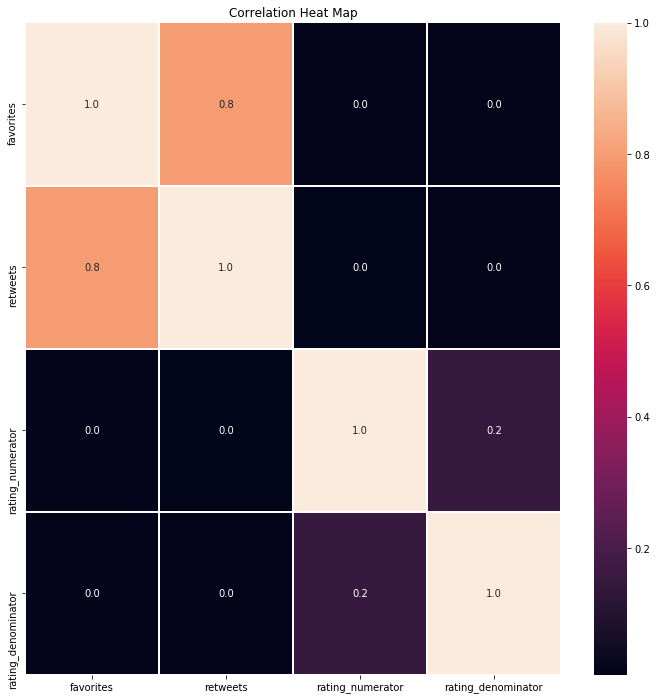

In [82]:
#correlation heat map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df[['source','favorites','retweets','rating_numerator','rating_denominator']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map');

#### Analysis

Strong correlation between favorites and retweets, this is as expected.

### Visualisation 2 - Top 10 frequently and correctly predicted dog breeds

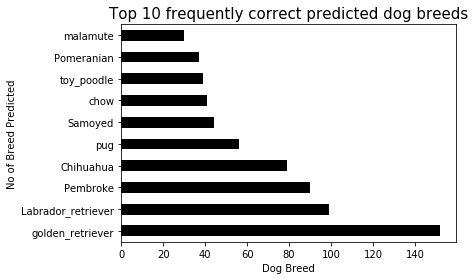

In [83]:
df['pred_breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'barh', color= 'black')
plt.ylabel('No of Breed Predicted')
plt.title('Top 10 frequently correct predicted dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.plot();

#### Analysis

Golden_retriver seems to be the most frequently and correctly predicted list in top 10 

### Visualisation 3:- Top 10 dog names 

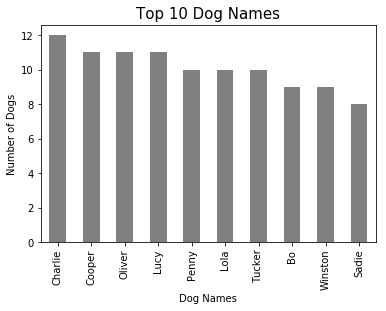

In [84]:
df['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color= 'grey')
plt.ylabel('Number of Dogs')
plt.title('Top 10 Dog Names', size=15)
plt.xlabel('Dog Names')
plt.plot();

#### Analysis

Charlie tops the list and including Cooper and Oliver are Top 3 favourites